# 기본 분류: 의류 이미지 분류

## 패션 MNIST 데이터셋 임포트하기


<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>{nbsp}   </td></tr>
</table>


Fashion MNIST 데이터셋은 위 그림과 같이 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 이루어져 있습니다.  

이번 페이지에서는 Dense 층들로 구성되는 Fully-Connected Neural Network (완전 연결된 인공신경망)을 이용해서 Fashion MNIST 데이터셋을 분류해 보겠습니다.  

순서는 아래와 같습니다.  


```
Fashion MNIST 데이터셋 불러오기
Fashion MNIST 데이터셋 살펴보기
Fashion MNIST 데이터셋 전처리하기
모델 구성하기
모델 컴파일하기
모델 훈련하기 - CNN 
모델의 정확도 평가하기
예측하기
내가 만든 이미지로 예측 결과 테스트 하기 
Fashion MNIST 이미지 인식 예제
```

## 라이브러리 로드

이 튜토리얼에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다. 상세 내용을 모두 이해하지 못해도 괜찮습니다. 여기서는 완전한 텐서플로(TensorFlow) 프로그램을 빠르게 살펴 보겠습니다. 자세한 내용은 앞으로 배우면서 더 설명합니다.

여기에서는 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 [tf.keras](https://www.tensorflow.org/guide/keras)를 사용합니다.

In [380]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## 데이터 셋 불러오기 

In [381]:
fashion_mnist = keras.datasets.fashion_mnist

# (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

tf.keras.datasets 모듈은 Neural Network의 훈련에 사용할 수 있는 여러 데이터셋을 포함합니다.  

예제에서는 fashion_mnist 데이터셋 모듈을 사용합니다.  
fashion_mnist 모듈은 데이터셋을 반환하는 load_data() 함수를 포함하는데, load_data() 함수를 호출하면 NumPy 어레이의 튜플을 반환합니다.  
train_images와 train_labels는 Neural Network 모델의 훈련 (training)에 사용되고,  
test_images와 test_labels는 테스트 (test)에 사용됩니다.  

대표 데이터 셋인 만큼 import하여 손쉽게 데이터를 불러올 수 있다.  
60,000개의 학습 데이터, 10,000개의 테스트 데이터로 나뉘어 있다.  
각 이미지는 28x28 크기로 784개의 픽셀을 가진다.  

In [382]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 데이터 셋 탐색

load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다:

- `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 *훈련 세트*입니다.
- `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 *테스트 세트*입니다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다:

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [383]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

비슷하게 훈련 세트에는 60,000개의 레이블이 있습니다:  레이블은 0과 9사이의 정수입니다:  
테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현됩니다:  
테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있습니다:  

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

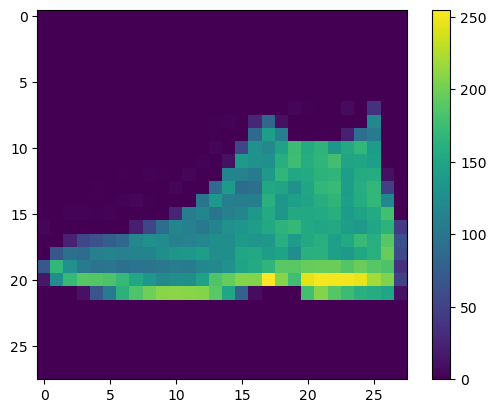

In [384]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다.   
이렇게 하려면 255로 나누어야 합니다. *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요합니다:

In [385]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

In [386]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


## Sequential API 를 사용하여 CNN모델 구성
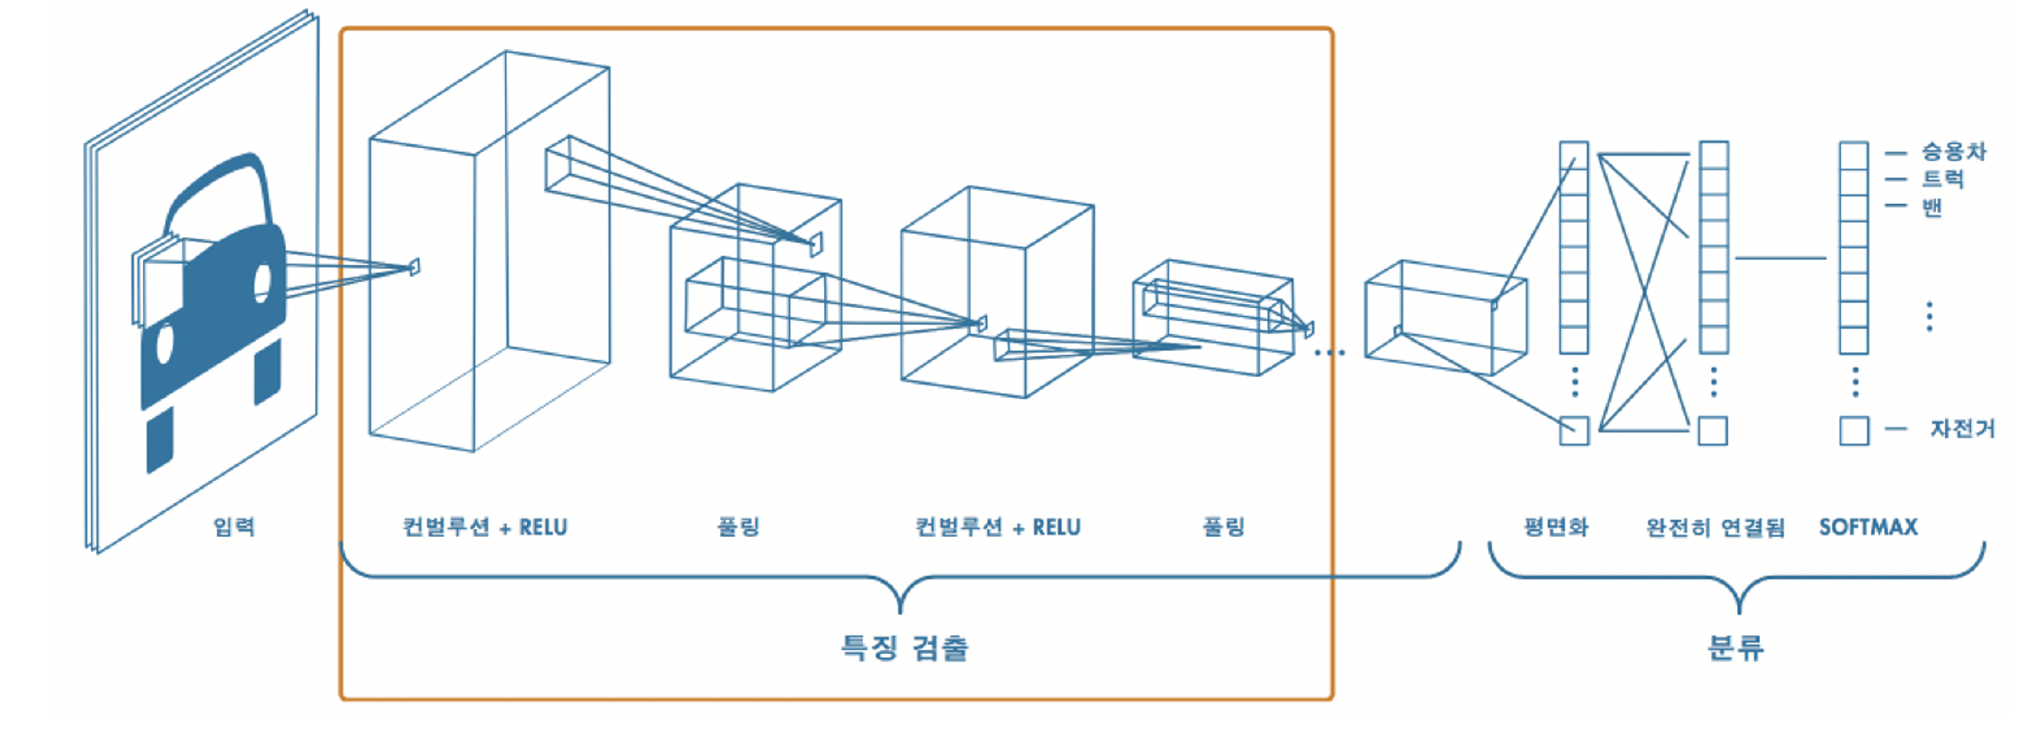
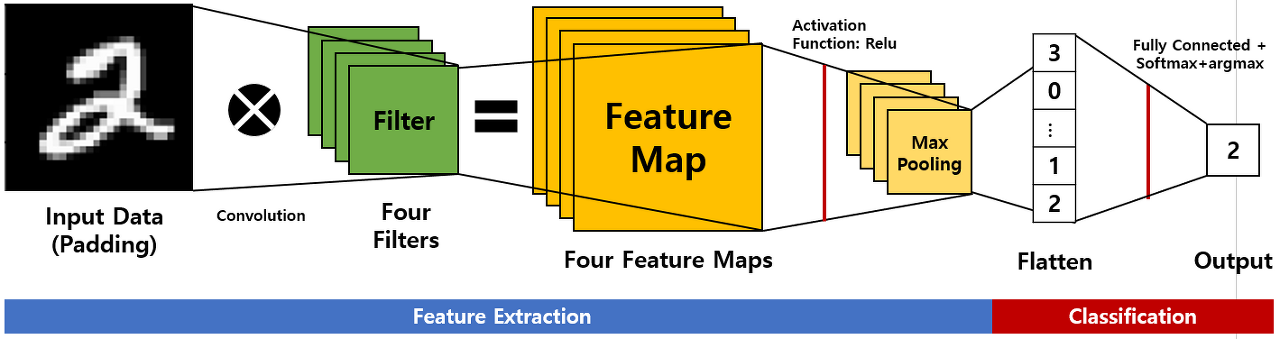
신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정

신경망의 기본 빌딩 블록은 [*레이어*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.  
Sequential() 클래스를 이용해서 신경망 모델을 순서대로 구성합니다.  

#### 각 Layer 설명
첫 번째 층은 컨볼루션층   
맨 앞(32): Kernel(Filter) 수입니다.   
kerel_size: Kernel의 크기를 지정합니다.   
input_shape: 샘플 수를 제외한 입력 형태를 정의합니다. (행, 열, 채널 수)로 정의합니다.   
(채널은 색상(R, G, B)을 의미하고 사용하는 데이터는 흑백 이미지이기 때문에 채널 수가 1입니다.)    
Padding: padding이 'SAME'이면 출력 데이터 사이즈와 입력 데이터 사이즈가 동일합니다.        
Activation: 활성화 함수를 설정합니다.    

In [387]:
from tensorflow.keras import layers, models


In [388]:
# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 3136)            

In [414]:
# !pip install pydot

In [413]:
# from IPython.display import SVG
# import pydot
# from keras.utils.vis_utils import model_to_dot
# import keras
# %matplotlib inline

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

tf.keras.layers.Flatten 클래스는 아래 그림과 같이 입력 데이터를 1차원으로 변환합니다.  
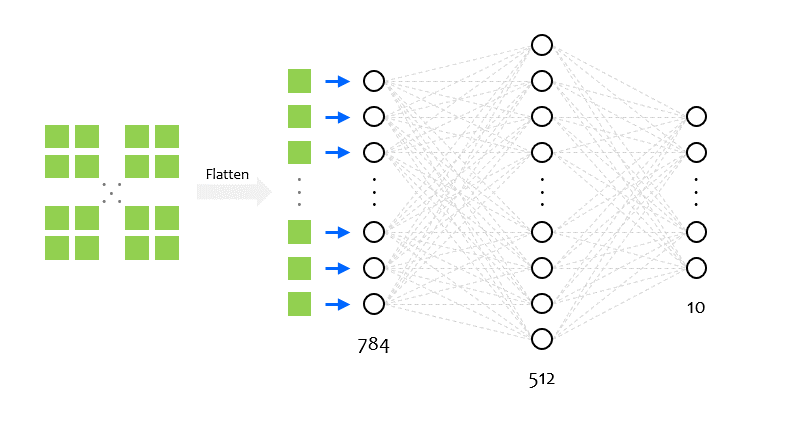

 `tf.keras.layers.Flatten`은 이미지 포맷을 1차원 배열로 변환합니다.



### 모델 컴파일

모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 [*컴파일*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 단계에서 추가됩니다.

- [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.(가중치와 편향을 업데이트)
- [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [389]:
import time

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


## 모델 훈련

신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.


### fit

훈련을 시작하려면 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다.

In [390]:
start_time = time.time()

# hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data=(X_test, y_test))
pred = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

print(f'Fit Time :{time.time() - start_time}')

Epoch 1/30
300/300 - 64s - loss: 0.4846 - accuracy: 0.8243 - val_loss: 0.3446 - val_accuracy: 0.8779 - 64s/epoch - 214ms/step
Epoch 2/30
300/300 - 64s - loss: 0.3184 - accuracy: 0.8852 - val_loss: 0.2949 - val_accuracy: 0.8911 - 64s/epoch - 214ms/step
Epoch 3/30
300/300 - 58s - loss: 0.2703 - accuracy: 0.9010 - val_loss: 0.2651 - val_accuracy: 0.9009 - 58s/epoch - 195ms/step
Epoch 4/30
300/300 - 54s - loss: 0.2432 - accuracy: 0.9097 - val_loss: 0.2479 - val_accuracy: 0.9079 - 54s/epoch - 179ms/step
Epoch 5/30
300/300 - 57s - loss: 0.2209 - accuracy: 0.9178 - val_loss: 0.2486 - val_accuracy: 0.9108 - 57s/epoch - 190ms/step
Epoch 6/30
300/300 - 54s - loss: 0.1999 - accuracy: 0.9257 - val_loss: 0.2316 - val_accuracy: 0.9154 - 54s/epoch - 182ms/step
Epoch 7/30
300/300 - 53s - loss: 0.1854 - accuracy: 0.9302 - val_loss: 0.2362 - val_accuracy: 0.9145 - 53s/epoch - 175ms/step
Epoch 8/30
300/300 - 53s - loss: 0.1688 - accuracy: 0.9381 - val_loss: 0.2323 - val_accuracy: 0.9173 - 53s/epoch - 176

fit() 메서드에 훈련에 사용할 이미지 데이터와 레이블을 입력해줍니다.  
에포크 (epochs)는 60000개의 전체 이미지를 몇 번 학습할지 설정합니다.  



모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성합니다.

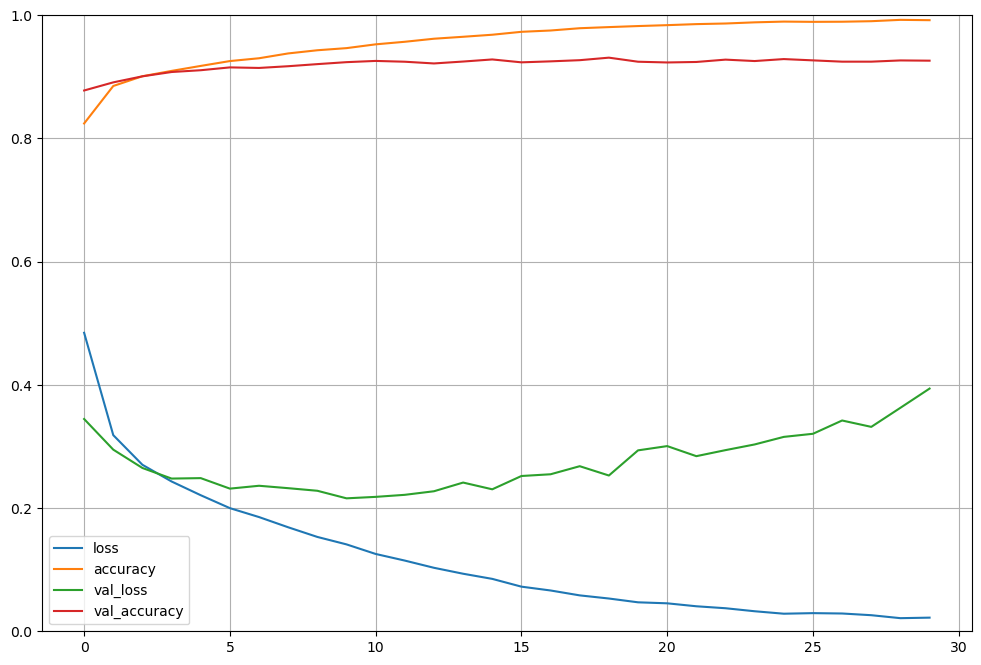

In [391]:
import pandas as pd 
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(pred.history[each], label = each)
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### 정확도 평가

evaluate() 메서드를 이용해서 손실 (loss)과 정확도 (accuracy)를 각각 얻을 수 있습니다.

In [392]:
score = model.evaluate(X_test, y_test)

print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 7s 19ms/step - loss: 0.3940 - accuracy: 0.9263
Test Loss : 0.3940010368824005
Test Accuracy  : 0.9262999892234802


10회 epoch의 학습을 통해 10000개의 테스트 이미지를 88%의 정확도로 분류할 수 있음을 의미합니다.  

테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다.   
훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 *과대적합*(overfitting) 때문입니다.   
과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.  

- [과대적합 시연](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [과대적합을 방지하기 위한 전략](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 예측하기

predict() 메서드를 사용하면 모델이 각 이미지의 클래스를 예측하는 결과를 확인할 수 있습니다.  
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.    
모델의 선형 출력, [로짓](https://developers.google.com/machine-learning/glossary#logits), 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.    

### 틀린 데이터 찾기

In [393]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

313/313 [==============================] - 6s 17ms/step


737

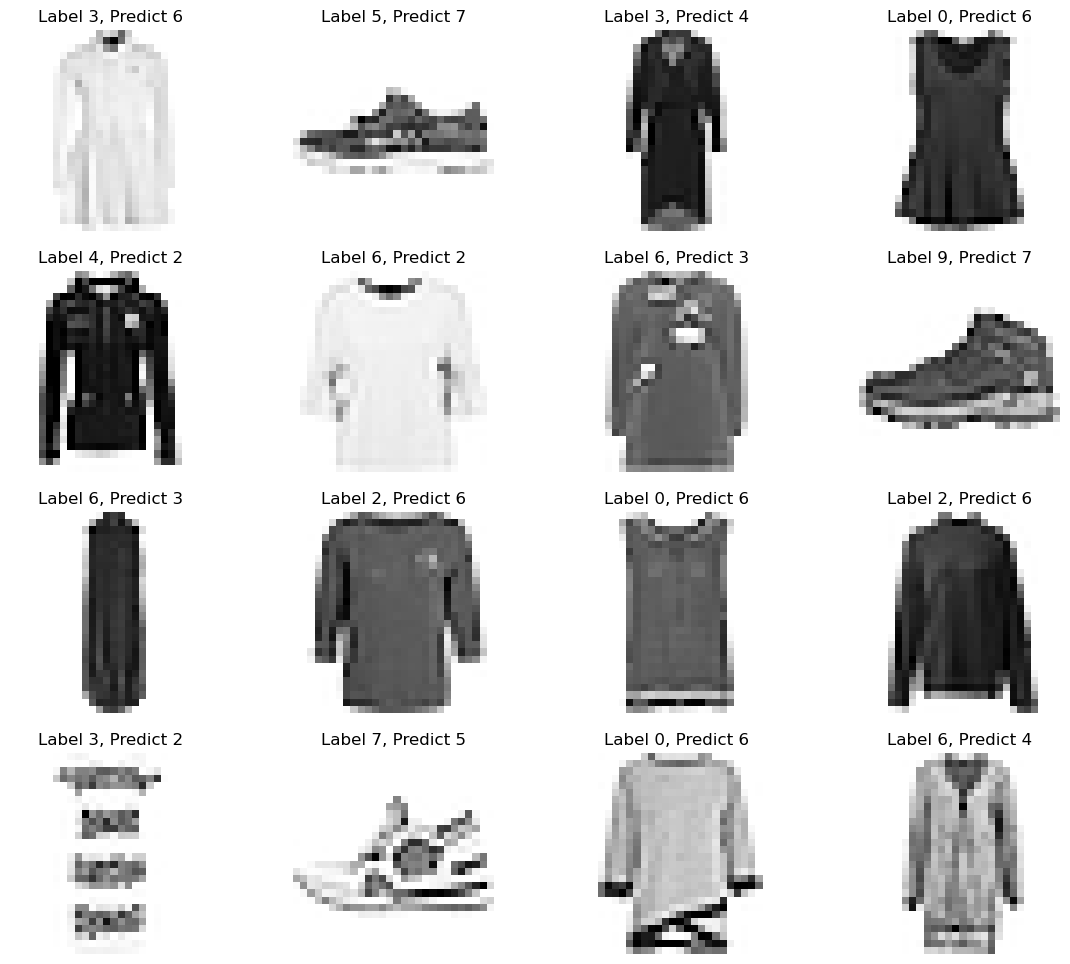

In [394]:
import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [395]:
model.save('MNIST_CNN_model.h5')

## 훈련된 모델 사용하기

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

### 직접 만든 이미지로 테스트 해보기

In [396]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

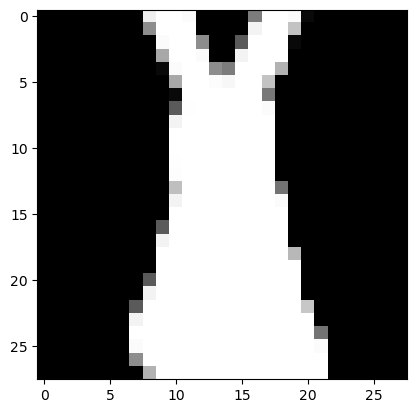

In [417]:
img = Image.open("image_test/test01.png").convert("L")
plt.imshow(np.array(img).reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
# test.png는 그림판에서 붓으로 드레스를 그린 이미지 
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환

In [418]:
img

In [419]:
model

In [420]:
# 이미지를 784개 흑백 픽셀로 사이즈 변환


# 데이터를 모델에 적용할 수 있도록 가공
test_data = (np.array(img).reshape(1,28, 28).astype('float32') /255.0)

model = load_model('MNIST_CNN_model.h5')

# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
res =(model.predict(test_data)>0.5).astype("int32")
print(f"Label: {class_names[res.tolist()[0].index(1)]} index: {res.tolist()[0].index(1)}")

1/1 [==============================] - 0s 175ms/step
Label: Shirt index: 6


##### ISSUE : DNN으로 학습시켰을때는 라벨이 3, 드레스 로 잘 출력이 되었는데 CNN으로 학습시켰을 때는 틀리게 예측이 되는 현상  